# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [2]:
import pandas as pd
import numpy as np

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [3]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx",nrows=30000,na_values=("Unknown","UNKNOWN","unknown"))
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(5)

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

* *Tip: there's an option with `.read_csv` to only read in a certain number of rows*

In [4]:
df.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [5]:
# Each row is a different animal. Animal name is the animal's name, and License issued date is the date its license was issued.
df.describe()

,owner_zip_code
count,30000.000000
mean,10681.231367
std,933.923243
min,1003.000000
25%,10028.000000
50%,10465.000000
75%,11228.000000
max,93036.000000


# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [6]:
# What breeds of dogs are most commonly guard or trained dogs?
# Which zip code has the most (licensed) dogs?
# What are the most popular breeds in each zip code? 
# What are the most common names by zip code? 

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [7]:
df.primary_breed.value_counts().head(10)

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: primary_breed, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

* *Tip: Maybe you want to go back to your `.read_csv` and use `na_values=`? Maybe not? Up to you!*

<AxesSubplot:>

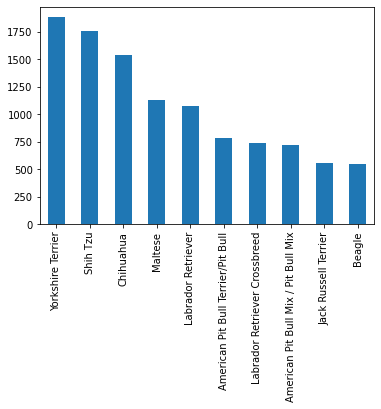

In [8]:
df.primary_breed.value_counts().head(10).plot(kind="bar")

## What are the most popular dog names?

In [9]:
df.animal_name.value_counts().head(10)

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: animal_name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [10]:
df.query("animal_name == 'Jasmine'")

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date
503,10032,Jasmine,F,American Pit Bull Terrier/Pit Bull,NaN,BRINDLE,WHITE,NaN,2004-07-01,Yes,No,Yes,2014-10-19 20:35:09.363,2014-10-19,2016-11-11
1526,10019,Jasmine,F,German Shepherd Dog,NaN,Black,Tan,Blond,2013-03-01,Yes,NaN,Yes,2015-01-05 09:45:11.490,2015-01-05,2018-01-05
2572,11236,Jasmine,F,Australian Shepherd,NaN,Tan,Blond,White,2010-07-01,Yes,NaN,Yes,2015-03-17 11:03:23.033,2015-03-17,2020-03-17
3458,11373,Jasmine,F,Papillon,NaN,White,Black,Brown,2003-01-01,Yes,No,Yes,2015-04-10 10:32:44.590,2015-04-10,2016-04-29
4346,10462,Jasmine,F,Yorkshire Terrier,NaN,BLACK,TAN,NaN,2007-05-01,Yes,No,Yes,2015-04-23 11:25:45.970,2015-04-23,2017-04-28
10222,11210,Jasmine,F,Chihuahua,NaN,FAWN,NaN,NaN,2013-04-01,No,No,Yes,2015-06-02 00:16:29.767,2015-06-02,2016-08-18
10821,10025,Jasmine,F,German Shepherd Crossbreed,NaN,BRINDLE,BROWN,NaN,2010-10-01,Yes,No,Yes,2015-06-04 22:00:49.457,2015-06-04,2016-07-06
12227,10024,Jasmine,F,Labradoodle,NaN,BLACK,NaN,NaN,2005-01-01,Yes,No,Yes,2015-06-11 16:58:56.377,2015-06-11,2016-07-11
15436,10128,Jasmine,F,"Poodle, Toy",NaN,Black,Black,Charcoal,2014-12-01,Yes,NaN,Yes,2015-06-23 19:23:54.187,2015-06-23,2016-06-23
19043,10075,Jasmine,F,West High White Terrier,NaN,WHITE,NaN,NaN,2006-06-01,Yes,No,Yes,2015-07-08 13:20:38.003,2015-07-08,2016-07-29


In [11]:
df.query("animal_name == 'Max'").shape

(202, 15)

In [12]:
df.query("animal_name == 'Maxwell'").shape

(11, 15)

## What percentage of dogs are guard dogs?

In [13]:
df.guard_or_trained.value_counts(normalize=True) * 100

No     99.914254
Yes     0.085746
Name: guard_or_trained, dtype: float64

## What are the actual numbers?

In [14]:
df.guard_or_trained.value_counts()

No     19809
Yes       17
Name: guard_or_trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`. Think about missing data!

In [15]:
df.guard_or_trained.value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: guard_or_trained, dtype: int64

## Maybe fill in all of those empty "Guard or Trained" columns with "No"? Or as `NaN`? 

Can we make an assumption either way? Then check your result with another `.value_counts()`

In [16]:
df['guard_or_trained'] = df['guard_or_trained'].replace(np.nan, "No")
df.guard_or_trained.value_counts()

No     29983
Yes       17
Name: guard_or_trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [17]:
df.query("guard_or_trained == 'Yes'").primary_breed.value_counts()

German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: primary_breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [18]:
df['year'] = df['animal_birth'].apply(lambda birth: birth.year)
df

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010
29997,11228,NaN,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [19]:
df['age'] = 2022 - df['year']
df

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,9
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,8
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,14
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,12
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,12
29997,11228,NaN,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,8
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,13


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [20]:
zip = pd.read_csv("zipcodes-neighborhoods.csv")
zip

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

You'll want to do these separately, and filter for each.

In [21]:
merged = df.merge(zip, left_on='owner_zip_code', right_on='zip')
merged

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,14,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,11,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,11,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,15,Upper West Side,10024,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29568,11436,Jack,M,Jack Russell Terrier,NaN,WHITE,BLACK,BROWN,2010-01-01,Yes,No,Yes,2015-08-09 17:43:18.710,2015-08-09,2016-08-10,2010,12,Jamaica,11436,Queens
29569,11436,ROXY,F,NaN,\HAR PEI X,BLACK,NaN,NaN,2003-01-01,Yes,No,Yes,2015-08-12 06:37:28.877,2015-08-12,2017-08-30,2003,19,Jamaica,11436,Queens
29570,11436,marco,M,Yorkshire Terrier,NaN,BROWN,GRAY,NaN,2009-01-01,No,No,Yes,2015-08-13 10:20:46.697,2015-08-13,2016-08-20,2009,13,Jamaica,11436,Queens
29571,11436,Maximilian,M,Shih Tzu,NaN,WHITE,TAN,NaN,2004-01-01,Yes,No,Yes,2015-08-19 11:49:32.743,2015-08-19,2016-08-30,2004,18,Jamaica,11436,Queens


In [22]:
merged.query("borough == 'Bronx'").animal_name.value_counts().head(1)

Bella    22
Name: animal_name, dtype: int64

In [23]:
merged.query("borough == 'Brooklyn'").animal_name.value_counts().head(1)

Max    46
Name: animal_name, dtype: int64

In [24]:
merged.query("neighborhood == 'Upper East Side'").animal_name.value_counts().head(1)

Charlie    19
Name: animal_name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

* *Tip: There are a few ways to do this, and some are awful (see the "top 5 breeds in each borough" question below).*

In [25]:
merged.groupby("neighborhood").primary_breed.value_counts().head(5)

# merged.query("borough == 'Bronx'").primary_breed.value_counts().head(5)

neighborhood  primary_breed     
Borough Park  Yorkshire Terrier     49
              Maltese               34
              Shih Tzu              34
              Chihuahua             32
              Labrador Retriever    19
Name: primary_breed, dtype: int64

In [26]:
merged.query("borough == 'Manhattan'").primary_breed.value_counts().head(5)

Chihuahua             511
Yorkshire Terrier     505
Shih Tzu              454
Labrador Retriever    422
Maltese               332
Name: primary_breed, dtype: int64

In [27]:
merged.query("borough == 'Queens'").primary_breed.value_counts().head(5)

Yorkshire Terrier     434
Shih Tzu              395
Chihuahua             306
Maltese               305
Labrador Retriever    208
Name: primary_breed, dtype: int64

In [28]:
merged.query("borough == 'Brooklyn'").primary_breed.value_counts().head(5)

Yorkshire Terrier     501
Shih Tzu              481
Chihuahua             391
Labrador Retriever    255
Maltese               247
Name: primary_breed, dtype: int64

In [29]:
merged.query("borough == 'Staten Island'").primary_breed.value_counts().head(5)

Yorkshire Terrier     171
Shih Tzu              165
Labrador Retriever    123
Chihuahua             100
Maltese                93
Name: primary_breed, dtype: int64

In [30]:
# merged.neighborhood.value_counts()
# pd.set_option('display.max_rows', None)

# merged.groupby("neighborhood").primary_breed.value_counts()
grouped = merged.groupby("neighborhood")
grouped.head(5)

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,14,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,11,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,11,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,15,Upper West Side,10024,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26604,10460,Chloe,F,Golden Retriever,NaN,Gold,NaN,NaN,2013-02-01,Yes,No,No,2014-10-24 20:44:42.637,2014-10-24,2016-10-24,2013,9,Central Bronx,10460,Bronx
26605,10460,CECILY,F,German Shepherd Dog,NaN,Black,Tan,NaN,2014-07-01,No,No,Yes,2014-10-28 23:25:12.593,2014-10-28,2016-10-28,2014,8,Central Bronx,10460,Bronx
26606,10460,RIPLEY,M,Yorkshire Terrier,NaN,BLACK,BROWN,NaN,2004-01-01,Yes,No,Yes,2014-11-13 11:15:00.020,2014-11-13,2016-09-29,2004,18,Central Bronx,10460,Bronx
26607,10460,TRIGGA,M,American Pit Bull Terrier/Pit Bull,NaN,TAN,WHITE,NaN,2011-08-01,Yes,No,Yes,2015-01-28 21:21:02.127,2015-01-28,2017-01-31,2011,11,Central Bronx,10460,Bronx


## What breed of dogs are the least likely to be spayed? Male or female?

* *Tip: This has a handful of interpretations, and some are easier than others. Feel free to skip it if you can't figure it out to your satisfaction.*

In [31]:
df.groupby("spayed_or_neut",).primary_breed.value_counts().head(5)

#Yorkshire

spayed_or_neut  primary_breed                     
No              Yorkshire Terrier                     537
                Shih Tzu                              405
                Chihuahua                             306
                Maltese                               306
                American Pit Bull Terrier/Pit Bull    173
Name: primary_breed, dtype: int64

In [32]:
df.groupby("spayed_or_neut").animal_gender.value_counts(normalize=True)

#Male dogs

spayed_or_neut  animal_gender
No              M                0.634064
                F                0.365936
Yes             M                0.521997
                F                0.477882
                                 0.000122
Name: animal_gender, dtype: float64

## Make a new column called `monochrome` that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [53]:
colors = ['black', 'white', 'gray']
df['monochrome'] = np.where(((df['animal_dominant_color'].str.lower().isin(colors)) & (df['animal_secondary_color'].str.lower().isin(colors)) & (df['animal_third_color'].str.lower().isin(colors))), True, False)
df

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age,monochrome
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,False
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,9,False
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,8,False
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,14,False
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,12,False
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,12,False
29997,11228,NaN,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,8,False
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,13,True


## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:>

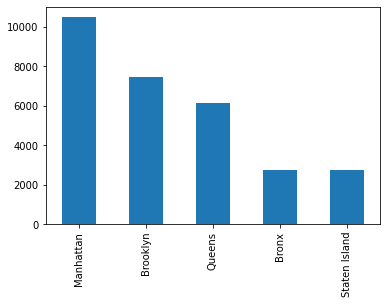

In [46]:
merged.borough.value_counts().plot(kind="bar")

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [ ]:
pop = pd.read_csv("boro_population.csv")
pop

In [ ]:
# dogsmerged = merged.merge(pop, left_on='borough', right_on='borough')
# dogsmerged.head(5)

dogspc = merged.borough.value_counts().rename_axis('borough').reset_index(name='value_counts')
dogspc

dogspcmerge = dogspc.merge(pop, left_on='borough', right_on='borough')

dogspcmerge['dogspercapita'] = dogspcmerge['value_counts']/dogspcmerge['population']
dogspcmerge

#Manhattan has the highest amount of dogs per capita

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [40]:
merged.groupby('borough')['primary_breed'].value_counts().groupby(level=0).head(5)

borough        primary_breed                     
Bronx          Yorkshire Terrier                     250
               Shih Tzu                              244
               Chihuahua                             208
               American Pit Bull Terrier/Pit Bull    181
               Maltese                               139
Brooklyn       Yorkshire Terrier                     501
               Shih Tzu                              481
               Chihuahua                             391
               Labrador Retriever                    255
               Maltese                               247
Manhattan      Chihuahua                             511
               Yorkshire Terrier                     505
               Shih Tzu                              454
               Labrador Retriever                    422
               Maltese                               332
Queens         Yorkshire Terrier                     434
               Shih Tzu               